# Introduction:
This analysis draws insights from a comprehensive dataset consisting of job postings extracted from Google's search results for Data Analyst positions in the United States. The dataset, collected daily starting from November 4th, 2022, encompasses a substantial 38,924 records(till now). Its robust size ensures reliability in extracting meaningful insights to guide job seekers aspiring for roles in data analysis.✌✌✌

Let's start with some initial descriptive analysis of the data:


### Load the data

In [56]:
import pandas as pd

df_jobs = pd.read_csv("../gsearch_jobs.csv", sep=",", index_col = 0)
df_jobs.head()


,index,title,company_name,location,via,description,extensions,job_id,thumbnail,posted_at,...,commute_time,salary_pay,salary_rate,salary_avg,salary_min,salary_max,salary_hourly,salary_yearly,salary_standardized,description_tokens
0,0,Data Analyst,Chloeta,"Oklahoma City, OK",via ZipRecruiter,Job Summary: The Data Analyst oversees data pr...,"['21 hours ago', 'Full-time', 'Health insuranc...",eyJqb2JfdGl0bGUiOiJEYXRhIEFuYWx5c3QiLCJodGlkb2...,NaN,21 hours ago,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"['r', 'python']"
1,1,Junior Data Analyst/Scientist Role - Contract ...,Upwork,Anywhere,via Upwork,"Company\n\nThe TAC Index provides independent,...","['17 hours ago', 'Work from home', 'Contractor...",eyJqb2JfdGl0bGUiOiJKdW5pb3IgRGF0YSBBbmFseXN0L1...,NaN,17 hours ago,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"['pandas', 'matlab', 'mysql', 'r', 'mongodb', ..."
2,2,Data Analyst,ATC,United States,via LinkedIn,Job Title: Entry Level Business Analyst / Prod...,"['12 hours ago', 'Full-time', 'Health insurance']",eyJqb2JfdGl0bGUiOiJEYXRhIEFuYWx5c3QiLCJodGlkb2...,https://encrypted-tbn0.gstatic.com/images?q=tb...,12 hours ago,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,[]
3,3,Data Analyst,Guidehouse,"Topeka, KS",via Nexxt,Job Family :\n\nData Science & Analysis (Digit...,"['10 hours ago', 'Full-time', 'Health insuranc...",eyJqb2JfdGl0bGUiOiJEYXRhIEFuYWx5c3QiLCJodGlkb2...,https://encrypted-tbn0.gstatic.com/images?q=tb...,10 hours ago,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"['word', 'tableau', 'perl', 'outlook', 'r', 'e..."
4,4,Data Analyst,AnMed Health LLC,Anywhere,via LinkedIn,"AnMed is a dynamic, comprehensive health syste...","['18 hours ago', 'Work from home', 'Part-time'...",eyJqb2JfdGl0bGUiOiJEYXRhIEFuYWx5c3QiLCJodGlkb2...,NaN,18 hours ago,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,[]


### Check the shape, missing values and plot them

In [1]:
import matplotlib as plt
print(df_jobs.shape)
display(df_jobs.isna().sum())
df_jobs.isna().sum().plot(kind = "bar")
print("Done")


NameError: name 'df_jobs' is not defined

#### Drop irrelevant columns and rename 


In [58]:
# drop those irrelavant  columns:
df_jobs.drop(['index','job_id','thumbnail','posted_at','salary','search_term','search_location','commute_time'],axis =1,inplace = True)

# rename all the columns:
df_jobs.columns = ['Job_Title', 'Company_Name', 'Location', 'Platform', 'Description', 'Extentions', 'Schedule_Type',
       'Work_From_Home', 'Date_Time', 'Salary_Range', 'Salary_Rate',
       'Salary_Avg', 'Salary_Min', 'Salary_Max', 'Salary_Hourly',
       'Salary_Yearly', 'Salary_Standardized', 'Skills']
df_jobs.columns
df_jobs


,Job_Title,Company_Name,Location,Platform,Description,Extentions,Schedule_Type,Work_From_Home,Date_Time,Salary_Range,Salary_Rate,Salary_Avg,Salary_Min,Salary_Max,Salary_Hourly,Salary_Yearly,Salary_Standardized,Skills
0,Data Analyst,Chloeta,"Oklahoma City, OK",via ZipRecruiter,Job Summary: The Data Analyst oversees data pr...,"['21 hours ago', 'Full-time', 'Health insuranc...",Full-time,NaN,2023-08-03 03:00:09.849838,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"['r', 'python']"
1,Junior Data Analyst/Scientist Role - Contract ...,Upwork,Anywhere,via Upwork,"Company\n\nThe TAC Index provides independent,...","['17 hours ago', 'Work from home', 'Contractor...",Contractor,True,2023-08-03 03:00:09.849838,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"['pandas', 'matlab', 'mysql', 'r', 'mongodb', ..."
2,Data Analyst,ATC,United States,via LinkedIn,Job Title: Entry Level Business Analyst / Prod...,"['12 hours ago', 'Full-time', 'Health insurance']",Full-time,NaN,2023-08-03 03:00:09.849838,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,[]
3,Data Analyst,Guidehouse,"Topeka, KS",via Nexxt,Job Family :\n\nData Science & Analysis (Digit...,"['10 hours ago', 'Full-time', 'Health insuranc...",Full-time,NaN,2023-08-03 03:00:09.849838,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"['word', 'tableau', 'perl', 'outlook', 'r', 'e..."
4,Data Analyst,AnMed Health LLC,Anywhere,via LinkedIn,"AnMed is a dynamic, comprehensive health syste...","['18 hours ago', 'Work from home', 'Part-time'...",Part-time,True,2023-08-03 03:00:09.849838,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,[]
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40486,Marketing Data & BI Analyst II,EDWARD JONES,"Houstonia, MO",via My ArkLaMiss Jobs,"At Edward Jones, we help clients achieve their...","['23 hours ago', '76,798–130,764 a year', 'Ful...",Full-time,NaN,2022-11-04 03:40:23.706734,76798–130764,a year,103781.0,76798.0,130764.0,NaN,103781.0,103781.0,"['tableau', 'sql', 'power_bi', 'r', 'excel', '..."
40487,Lead-Data Analyst,EDWARD JONES,"Marshfield, MO",via My ArkLaMiss Jobs,"At Edward Jones, we help clients achieve their...","['23 hours ago', '106,916–182,047 a year', 'Fu...",Full-time,NaN,2022-11-24 04:00:08.710801,106916–182047,a year,144481.5,106916.0,182047.0,NaN,144481.5,144481.5,[]
40488,Lead-Data Analyst,EDWARD JONES,"High Point, MO",via My ArkLaMiss Jobs,"At Edward Jones, we help clients achieve their...","['23 hours ago', '106,916–182,047 a year', 'Fu...",Full-time,NaN,2022-12-07 04:00:12.563831,106916–182047,a year,144481.5,106916.0,182047.0,NaN,144481.5,144481.5,[]
40489,Lead-Data Analyst,EDWARD JONES,"Calhoun, MO",via My ArkLaMiss Jobs,"At Edward Jones, we help clients achieve their...","['23 hours ago', '106,916–182,047 a year', 'Fu...",Full-time,NaN,2022-12-08 04:00:15.975728,106916–182047,a year,144481.5,106916.0,182047.0,NaN,144481.5,144481.5,[]


# Let's dive into some  Statistics

In [59]:
# Basic descriptive statistics 
print(df_jobs.describe())



          Salary_Avg     Salary_Min     Salary_Max  Salary_Hourly  \
count    6889.000000    6511.000000    6511.000000    4511.000000   
mean    34991.206017   29333.637067   41443.680178      41.779786   
std     51833.525488   43585.753218   61386.578621      22.995872   
min         7.250000       8.000000      10.000000       7.250000   
25%        30.000000      18.330000      42.000000      25.000000   
50%        57.500000      40.000000      75.000000      35.000000   
75%     85000.000000   72000.000000  100000.000000      57.500000   
max    300000.000000  275000.000000  346000.000000     300.000000   

       Salary_Yearly  Salary_Standardized  
count    2362.000000          6889.000000  
mean   101932.959803         92028.444363  
std     31871.359154         43565.735259  
min     29289.840000         15080.000000  
25%     81641.000000         62400.000000  
50%     96500.000000         89500.000000  
75%    114500.000000        117520.000000  
max    300000.000000      

### Check the correlation between attributes through a *correlation matrix*

In [60]:
print(df_jobs[['Salary_Avg', 'Salary_Min', 'Salary_Max', 'Salary_Hourly',
       'Salary_Yearly', 'Salary_Standardized']].corr())

                     Salary_Avg  Salary_Min  Salary_Max  Salary_Hourly  \
Salary_Avg             1.000000    0.992882    0.996418       1.000000   
Salary_Min             0.992882    1.000000    0.979253       0.866070   
Salary_Max             0.996418    0.979253    1.000000       0.954036   
Salary_Hourly          1.000000    0.866070    0.954036       1.000000   
Salary_Yearly          1.000000    0.947386    0.972832            NaN   
Salary_Standardized    0.307659    0.309053    0.310813       1.000000   

                     Salary_Yearly  Salary_Standardized  
Salary_Avg                1.000000             0.307659  
Salary_Min                0.947386             0.309053  
Salary_Max                0.972832             0.310813  
Salary_Hourly                  NaN             1.000000  
Salary_Yearly             1.000000             1.000000  
Salary_Standardized       1.000000             1.000000  


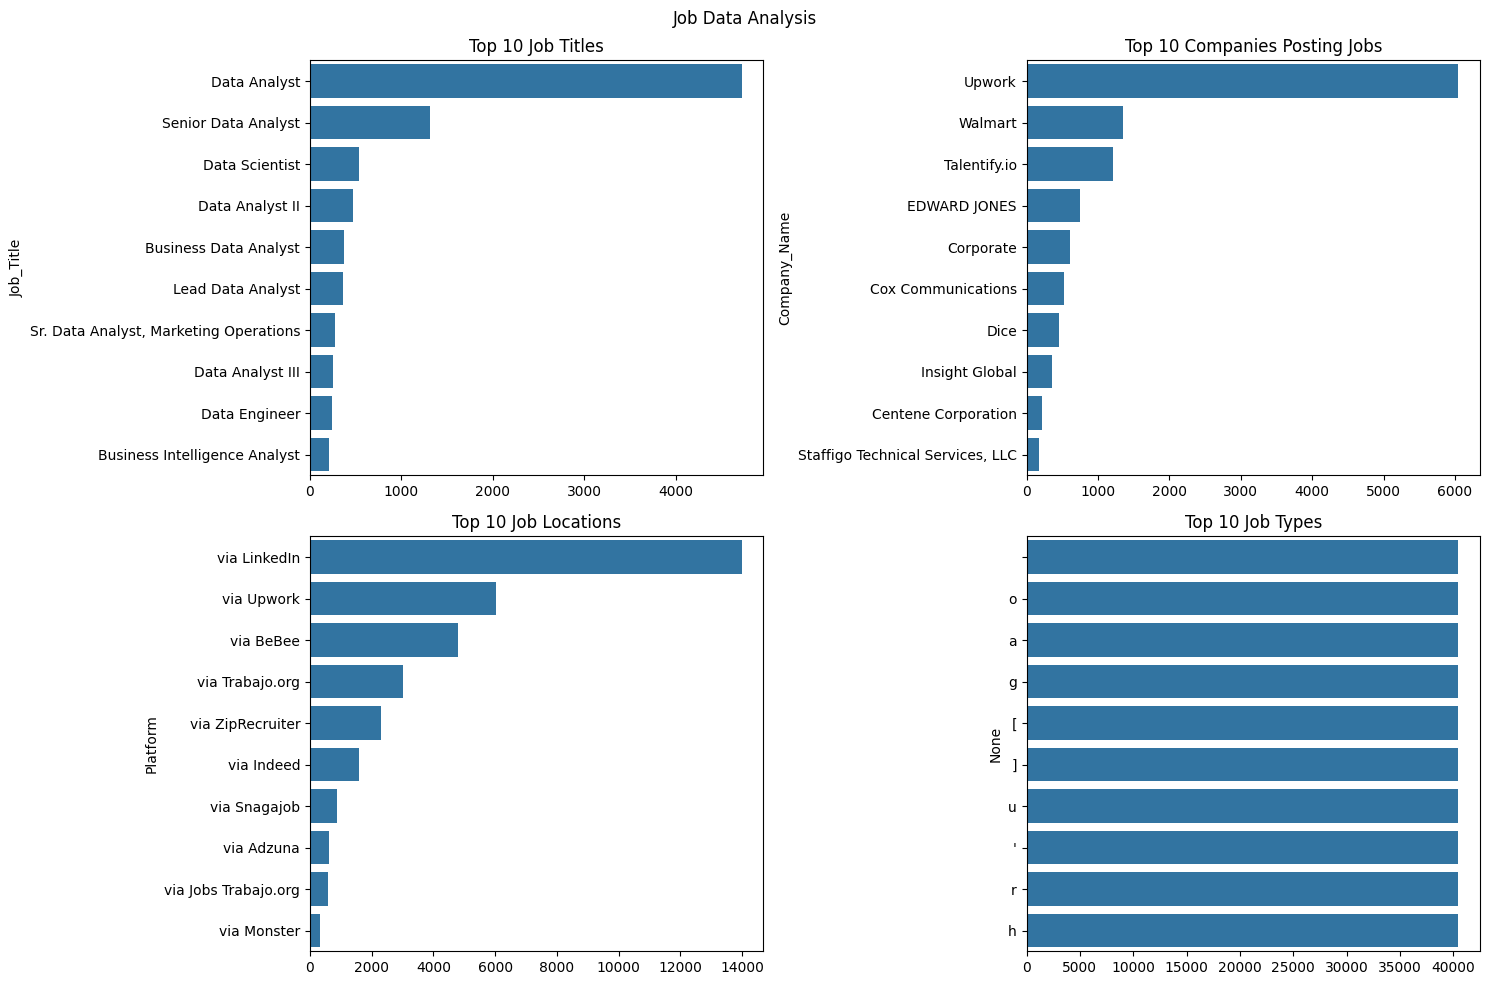

In [64]:
import matplotlib.pyplot as plt
import seaborn as sns

# Analyzing distribution of job titles
job_titles = df_jobs['Job_Title'].value_counts().head(10)

# Analyzing distribution of companies
companies = df_jobs['Company_Name'].value_counts().head(10)

# Analyzing job locations
locations = df_jobs['Platform'].value_counts().head(10)

# Analyzing job types (Extracting from 'extensions' column)
job_types = df_jobs['Extentions'].str.join('|').str.get_dummies(sep='|').sum().sort_values(ascending=False).head(10)

# Plotting the distributions
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
fig.suptitle('Job Data Analysis')

sns.barplot(ax=axes[0, 0], x=job_titles.values, y=job_titles.index)
axes[0, 0].set_title('Top 10 Job Titles')

sns.barplot(ax=axes[0, 1], x=companies.values, y=companies.index)
axes[0, 1].set_title('Top 10 Companies Posting Jobs')

sns.barplot(ax=axes[1, 0], x=locations.values, y=locations.index)
axes[1, 0].set_title('Top 10 Job Locations')

sns.barplot(ax=axes[1, 1], x=job_types.values, y=job_types.index)
axes[1, 1].set_title('Top 10 Job Types')

plt.tight_layout()
plt.show()

# # Basic descriptive statistics
# print(desc_stats.T)  # Transposed for better readability